# Letter Image Recognition

## Source Information:

- Creator: David J. Slate
- Odesta Corporation; 1890 Maple Ave; Suite 115; Evanston, IL 60201
- Donor: David J. Slate (dave@math.nwu.edu) (708) 491-3867   
- Date: January, 1991

## Relevant Information:

The objective is to identify each of a large number of black-and-white rectangular pixel displays as one of the 26 capital letters in the English alphabet. The character images were based on 20 different fonts and each letter within these 20 fonts was randomly distorted to produce a file of 20,000 unique stimuli.  Each stimulus was converted into 16 primitive numerical attributes (statistical moments and edge counts) which were then scaled to fit into a range of integer values from 0 through 15.  We typically train on the first 16000 items and then use the resulting model to predict the letter category for the remaining 4000.  See the article cited above for more details.

## Number of Instances: 

20000

## Number of Attributes: 

17 (Letter category and 16 numeric features)

## Attribute Information:

	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)

## Missing Attribute Values: 

None

## Class Distribution:

 	789 A	   766 B     736 C     805 D	 768 E	   775 F     773 G
 	734 H	   755 I     747 J     739 K	 761 L	   792 M     783 N
 	753 O	   803 P     783 Q     758 R	 748 S	   796 T     813 U
 	764 V	   752 W     787 X     786 Y	 734 Z


In [1]:
# Import all necessary dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Data preparation

In [2]:
# Load data
dataSet = pd.read_csv("data\letter-recognition.data", names=["letter", "x-box", "y-box", "width", "high", "onpix", "x-bar", "y-bar", "x2bar", "y2bar", "xybar", "x2ybr", "xy2br", "x-ege", "xegvy", "y-ege", "yegvx"])
dataSet.head()

,letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
# Data frame info
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   x-box   20000 non-null  int64 
 2   y-box   20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   high    20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   x-bar   20000 non-null  int64 
 7   y-bar   20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybr   20000 non-null  int64 
 12  xy2br   20000 non-null  int64 
 13  x-ege   20000 non-null  int64 
 14  xegvy   20000 non-null  int64 
 15  y-ege   20000 non-null  int64 
 16  yegvx   20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [4]:
# Look at 'letter' attribute because it has type 'object'
dataSet.letter.unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [5]:
# Make it as category variable
dataSet.letter = dataSet.letter.astype("category")
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   letter  20000 non-null  category
 1   x-box   20000 non-null  int64   
 2   y-box   20000 non-null  int64   
 3   width   20000 non-null  int64   
 4   high    20000 non-null  int64   
 5   onpix   20000 non-null  int64   
 6   x-bar   20000 non-null  int64   
 7   y-bar   20000 non-null  int64   
 8   x2bar   20000 non-null  int64   
 9   y2bar   20000 non-null  int64   
 10  xybar   20000 non-null  int64   
 11  x2ybr   20000 non-null  int64   
 12  xy2br   20000 non-null  int64   
 13  x-ege   20000 non-null  int64   
 14  xegvy   20000 non-null  int64   
 15  y-ege   20000 non-null  int64   
 16  yegvx   20000 non-null  int64   
dtypes: category(1), int64(16)
memory usage: 2.5 MB


In [6]:
def Standarize(data):
    mean = data.mean()
    standardDeviation = data.std()
    return (data - mean) / standardDeviation

In [7]:
def Normalize(data):
    return (data - data.min()) / (data.max() - data.min())

In [8]:
# Divide data due to target variable
xOriginal = dataSet.iloc[:, 1:]
yOriginal = dataSet.letter

In [9]:
# Split data into train and test sets
import sklearn.model_selection

indexTrain, indexTest = sklearn.model_selection.train_test_split(np.arange(xOriginal.shape[0]), test_size=0.2, random_state=0)
xTrain, xTest = xOriginal.iloc[indexTrain, :], xOriginal.iloc[indexTest, :]
yTrain, yTest = yOriginal[indexTrain], yOriginal[indexTest]

In [10]:
# Function that compute classifier's score
import sklearn.metrics

def ClassifierScore(alg, xTrain, xTest, yTrain, yTest):
    alg.fit(xTrain, yTrain)
    yTrainPred = alg.predict(xTrain)
    yTestPred = alg.predict(xTest)
    return {
        "Accuracy_Train": sklearn.metrics.accuracy_score(yTrainPred, yTrain),
        "Accuracy_Test": sklearn.metrics.accuracy_score(yTestPred, yTest),
        "Precision_Train":   sklearn.metrics.precision_score(yTrainPred, yTrain, average='macro'),
        "Precision_Test":   sklearn.metrics.precision_score(yTestPred, yTest, average='macro'),
        "Recall_Train":   sklearn.metrics.recall_score(yTrainPred, yTrain, average='macro'),
        "Recall_Test":   sklearn.metrics.recall_score(yTestPred, yTest, average='macro'),
        "F1_Train":  sklearn.metrics.f1_score(yTrainPred, yTrain, average='macro'),
        "F1_Test":  sklearn.metrics.f1_score(yTestPred, yTest, average='macro')
    }

### K-Nearest Neighbors algorithm

In [11]:
# Original values
import sklearn.neighbors

score = pd.DataFrame({'kNeighbors_Original': ClassifierScore(sklearn.neighbors.KNeighborsClassifier(), xTrain, xTest, yTrain, yTest)}).T
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804


In [12]:
# Standarized values
score = score.append(pd.DataFrame({'kNeighbors_Standarized': ClassifierScore(sklearn.neighbors.KNeighborsClassifier(), Standarize(xTrain), Standarize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984


In [13]:
# Normalized values
score = score.append(pd.DataFrame({'kNeighbors_Normalized': ClassifierScore(sklearn.neighbors.KNeighborsClassifier(), Normalize(xTrain), Normalize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123


Best results for KNN classifier are for original data. The similarity of results may exist because authors of this data set mention about scaling all attributes to range from 0 to 15.

In [14]:
# Check what number of neighbours will be most efficient
trainAccuracy = list()
testAccuracy = list()

for index in range(1, 30):
    kNeighborsClass = sklearn.neighbors.KNeighborsClassifier(n_neighbors=index, n_jobs=-1)
    kNeighborsClass.fit(xTrain, yTrain)
    yTrainClass = kNeighborsClass.predict(xTrain)
    yTestClass = kNeighborsClass.predict(xTest)
    
    trainAccuracy.append(sklearn.metrics.accuracy_score(yTrainClass, yTrain))    
    testAccuracy.append(sklearn.metrics.accuracy_score(yTestClass, yTest))

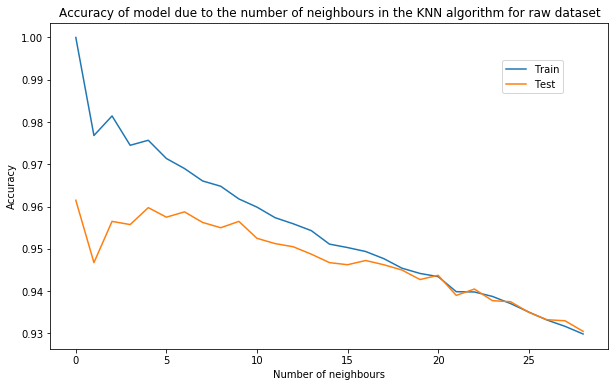

In [15]:
# Chart of results
plt.figure(figsize=(10,6))
plt.plot(trainAccuracy, label="Train")
plt.plot(testAccuracy, label="Test")
plt.xlabel("Number of neighbours")
plt.ylabel("Accuracy")
plt.title("Accuracy of model due to the number of neighbours in the KNN algorithm for raw dataset")
plt.legend(bbox_to_anchor=(0.8, 0.9), loc='upper left')
plt.show()

In [16]:
# Preparaton to grid search to find out which settings are best for my model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

gridSearchParameters = [
  {'weights': ['uniform', 'distance'],
   'p': [1, 2],
   'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
   'n_neighbors': [17, 18, 19, 20]}
 ]

scorer = {'acc': 'accuracy', 'f1': 'f1_macro', 'prec': 'precision_macro', 'rec': 'recall_macro'}

In [17]:
# Build grid search
gridSearch = GridSearchCV(estimator=sklearn.neighbors.KNeighborsClassifier(), param_grid=gridSearchParameters, scoring=scorer, n_jobs=-1, refit='acc', cv=10)

gridSearch.fit(xOriginal, yOriginal)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [17, 18, 19, 20], 'p': [1, 2],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit='acc', return_train_score=False,
             scoring={'acc': 'accuracy', 'f1': 'f1_macro',
                      'prec': 'precision_macro', 'rec': 'recall_macro'},
             verbose=0)

In [18]:
print ("Estimator")
print (gridSearch.best_estimator_)
print ("Params")
print (gridSearch.best_params_)
print ("Score")
print (gridSearch.best_score_)

Estimator
KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=1,
                     weights='distance')
Params
{'algorithm': 'brute', 'n_neighbors': 17, 'p': 1, 'weights': 'distance'}
Score
0.95505


In [19]:
# GridSearch result score
score = score.append(pd.DataFrame({'kNeighbors_GridSearch': ClassifierScore(sklearn.neighbors.KNeighborsClassifier(algorithm='brute', n_neighbors=17, p=1, weights='distance'), xTrain, xTest, yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000


### Decision Tree algorithm

In [20]:
# Original values
import sklearn.tree

score = score.append(pd.DataFrame({'decisionTree_Original': ClassifierScore(sklearn.tree.DecisionTreeClassifier(), xTrain, xTest, yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000


In [21]:
# Standarized values
score = score.append(pd.DataFrame({'decisionTree_Standarized': ClassifierScore(sklearn.tree.DecisionTreeClassifier(), Standarize(xTrain), Standarize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000


In [22]:
# Normalized values
score = score.append(pd.DataFrame({'decisionTree_Normalized': ClassifierScore(sklearn.tree.DecisionTreeClassifier(), Normalize(xTrain), Normalize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000
decisionTree_Normalized,0.75525,1.000000,0.751671,1.000000,0.755292,1.000000,0.767893,1.000000


Best results for Decision Tree classifier are again for standarized data. It is worse than KNN classifier but nothing happens if I research its statistics.

In [23]:
# Check what depth of tree will be most efficient
trainAccuracy = list()
testAccuracy = list()

for index in range(1, 30):
    decisionTreeClass = sklearn.tree.DecisionTreeClassifier(max_depth=index)
    decisionTreeClass.fit(Standarize(xTrain), yTrain)
    yTrainClass = decisionTreeClass.predict(Standarize(xTrain))
    yTestClass = decisionTreeClass.predict(Standarize(xTest))
    
    trainAccuracy.append(sklearn.metrics.accuracy_score(yTrainClass, yTrain))    
    testAccuracy.append(sklearn.metrics.accuracy_score(yTestClass, yTest))

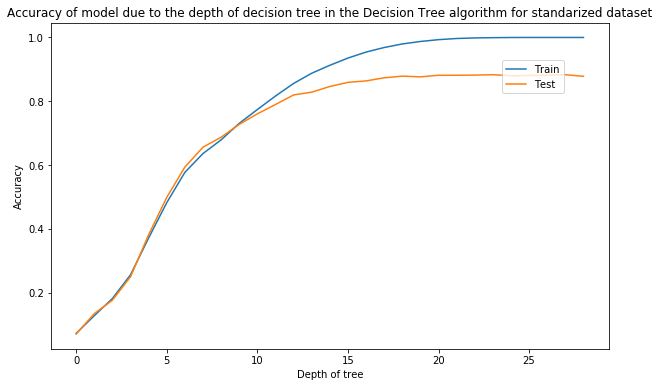

In [24]:
# Chart of results
plt.figure(figsize=(10,6))
plt.plot(trainAccuracy, label="Train")
plt.plot(testAccuracy, label="Test")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.title("Accuracy of model due to the depth of decision tree in the Decision Tree algorithm for standarized dataset")
plt.legend(bbox_to_anchor=(0.8, 0.9), loc='upper left')
plt.show()

In [25]:
# Preparaton to grid search to find out which settings are best for my model

gridSearchParameters = [
  {'criterion': ['gini', 'entropy'],
   'splitter': ['best', 'random'],
   'min_samples_split': [1, 2, 3],
   'max_depth': [8, 9, 10, 11],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', None]}
 ]

scorer = {'acc': 'accuracy', 'f1': 'f1_macro', 'prec': 'precision_macro', 'rec': 'recall_macro'}

In [26]:
# Build grid search
gridSearch = GridSearchCV(estimator=sklearn.tree.DecisionTreeClassifier(), param_grid=gridSearchParameters, scoring=scorer, n_jobs=-1, refit='acc', cv=10)

gridSearch.fit(Standarize(xOriginal), yOriginal)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='d...
             param_grid=[{'class_weight': ['balanced', None],
                          'criterion

In [27]:
print ("Estimator")
print (gridSearch.best_estimator_)
print ("Params")
print (gridSearch.best_params_)
print ("Score")
print (gridSearch.best_score_)

Estimator
DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=11, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=3, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')
Params
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 11, 'max_features': None, 'min_samples_split': 3, 'splitter': 'best'}
Score
0.84185


In [28]:
# GridSearch result score
score = score.append(pd.DataFrame({'decisionTree_GridSearch': ClassifierScore(sklearn.tree.DecisionTreeClassifier(class_weight='balanced', criterion='entropy', max_depth=11, max_features=None, min_samples_split=3, splitter='best'), Standarize(xTrain), Standarize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000
decisionTree_Normalized,0.75525,1.000000,0.751671,1.000000,0.755292,1.000000,0.767893,1.000000
decisionTree_GridSearch,0.84700,0.892250,0.846015,0.892265,0.846397,0.891779,0.848641,0.894884


### Random Forest algorithm

In [29]:
# Original values
import sklearn.ensemble

score = score.append(pd.DataFrame({'randomForest_Original': ClassifierScore(sklearn.ensemble.RandomForestClassifier(), xTrain, xTest, yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000
decisionTree_Normalized,0.75525,1.000000,0.751671,1.000000,0.755292,1.000000,0.767893,1.000000
decisionTree_GridSearch,0.84700,0.892250,0.846015,0.892265,0.846397,0.891779,0.848641,0.894884
randomForest_Original,0.97125,1.000000,0.971022,1.000000,0.970885,1.000000,0.971384,1.000000


In [30]:
# Standarized values
score = score.append(pd.DataFrame({'randomForest_Standarized': ClassifierScore(sklearn.ensemble.RandomForestClassifier(), Standarize(xTrain), Standarize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000
decisionTree_Normalized,0.75525,1.000000,0.751671,1.000000,0.755292,1.000000,0.767893,1.000000
decisionTree_GridSearch,0.84700,0.892250,0.846015,0.892265,0.846397,0.891779,0.848641,0.894884
randomForest_Original,0.97125,1.000000,0.971022,1.000000,0.970885,1.000000,0.971384,1.000000
randomForest_Standarized,0.97075,1.000000,0.970114,1.000000,0.969929,1.000000,0.970609,1.000000


In [31]:
# Normalized values
score = score.append(pd.DataFrame({'randomForest_Normalized': ClassifierScore(sklearn.ensemble.RandomForestClassifier(), Normalize(xTrain), Normalize(xTest), yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000
decisionTree_Normalized,0.75525,1.000000,0.751671,1.000000,0.755292,1.000000,0.767893,1.000000
decisionTree_GridSearch,0.84700,0.892250,0.846015,0.892265,0.846397,0.891779,0.848641,0.894884
randomForest_Original,0.97125,1.000000,0.971022,1.000000,0.970885,1.000000,0.971384,1.000000
randomForest_Standarized,0.97075,1.000000,0.970114,1.000000,0.969929,1.000000,0.970609,1.000000


Best results occurred for Random Forest classifier for original data.

In [32]:
# Check what number of estimators will be most efficient
trainAccuracy = list()
testAccuracy = list()

for index in range(10, 200, 2):
    randomForestClass = sklearn.ensemble.RandomForestClassifier(n_estimators=index, n_jobs=-1)
    randomForestClass.fit(xTrain, yTrain)
    yTrainClass = randomForestClass.predict(xTrain)
    yTestClass = randomForestClass.predict(xTest)
    
    trainAccuracy.append(sklearn.metrics.accuracy_score(yTrainClass, yTrain))    
    testAccuracy.append(sklearn.metrics.accuracy_score(yTestClass, yTest))

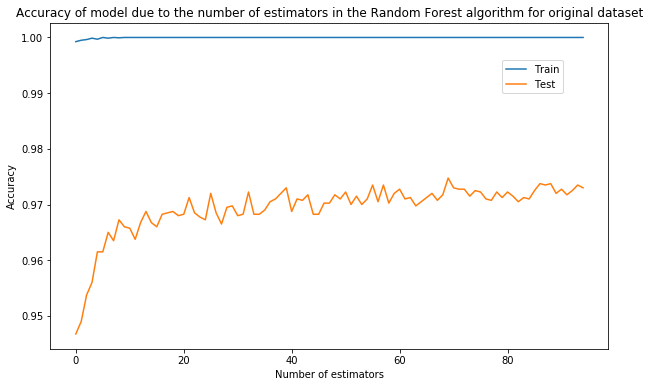

In [33]:
# Chart of results
plt.figure(figsize=(10,6))
plt.plot(trainAccuracy, label="Train")
plt.plot(testAccuracy, label="Test")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.title("Accuracy of model due to the number of estimators in the Random Forest algorithm for original dataset")
plt.legend(bbox_to_anchor=(0.8, 0.9), loc='upper left')
plt.show()

Default value of estimators is 100 and in my opinion there is no reason to manipulate that attribute due to it values at chart. Note that range is defined as range(10, 200, **2**)

In [34]:
# Check what tree depth will be most efficient
trainAccuracy = list()
testAccuracy = list()

for index in range(1, 30):
    randomForestClass = sklearn.ensemble.RandomForestClassifier(max_depth=index, n_jobs=-1)
    randomForestClass.fit(xTrain, yTrain)
    yTrainClass = randomForestClass.predict(xTrain)
    yTestClass = randomForestClass.predict(xTest)
    
    trainAccuracy.append(sklearn.metrics.accuracy_score(yTrainClass, yTrain))    
    testAccuracy.append(sklearn.metrics.accuracy_score(yTestClass, yTest))

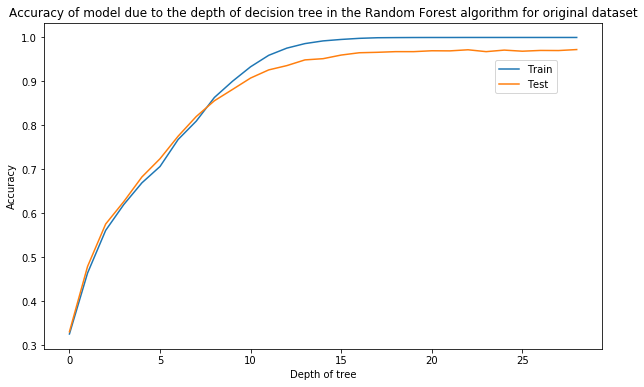

In [35]:
# Chart of results
plt.figure(figsize=(10,6))
plt.plot(trainAccuracy, label="Train")
plt.plot(testAccuracy, label="Test")
plt.xlabel("Depth of tree")
plt.ylabel("Accuracy")
plt.title("Accuracy of model due to the depth of decision tree in the Random Forest algorithm for original dataset")
plt.legend(bbox_to_anchor=(0.8, 0.9), loc='upper left')
plt.show()

In [36]:
# Preparaton to grid search to find out which settings are best for my model

gridSearchParameters = [
  {'criterion': ['gini', 'entropy'],
   'min_samples_split': [1, 2, 3],
   'max_depth': [7, 8, 9, 10],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'class_weight': ['balanced', 'balanced_subsample', None]}
 ]

scorer = {'acc': 'accuracy', 'f1': 'f1_macro', 'prec': 'precision_macro', 'rec': 'recall_macro'}

In [37]:
# Build grid search
gridSearch = GridSearchCV(estimator=sklearn.ensemble.RandomForestClassifier(), param_grid=gridSearchParameters, scoring=scorer, n_jobs=-1, refit='acc', cv=10)

gridSearch.fit(xOriginal, yOriginal)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
             param_grid=[{'class_weight': ['balanced', 'balanced_subsample',
                                  

In [38]:
print ("Estimator")
print (gridSearch.best_estimator_)
print ("Params")
print (gridSearch.best_params_)
print ("Score")
print (gridSearch.best_score_)

Estimator
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Params
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 3}
Score
0.9230499999999999


In [39]:
# GridSearch result score
score = score.append(pd.DataFrame({'randomForest_GridSearch': ClassifierScore(sklearn.ensemble.RandomForestClassifier(class_weight=None, criterion='entropy', max_depth=10, max_features='sqrt', min_samples_split=3), xTrain, xTest, yTrain, yTest)}).T)
score

,Accuracy_Test,Accuracy_Train,F1_Test,F1_Train,Precision_Test,Precision_Train,Recall_Test,Recall_Train
kNeighbors_Original,0.95975,0.975688,0.959358,0.975644,0.959405,0.975606,0.959618,0.975804
kNeighbors_Standarized,0.95275,0.971812,0.952854,0.971784,0.952836,0.971742,0.953275,0.971984
kNeighbors_Normalized,0.94900,0.975000,0.948639,0.974960,0.948899,0.974927,0.949000,0.975123
kNeighbors_GridSearch,0.96150,1.000000,0.961387,1.000000,0.961340,1.000000,0.961921,1.000000
decisionTree_Original,0.87975,1.000000,0.879202,1.000000,0.880009,1.000000,0.879481,1.000000
decisionTree_Standarized,0.88075,1.000000,0.880403,1.000000,0.881188,1.000000,0.880684,1.000000
decisionTree_Normalized,0.75525,1.000000,0.751671,1.000000,0.755292,1.000000,0.767893,1.000000
decisionTree_GridSearch,0.84700,0.892250,0.846015,0.892265,0.846397,0.891779,0.848641,0.894884
randomForest_Original,0.97125,1.000000,0.971022,1.000000,0.970885,1.000000,0.971384,1.000000
randomForest_Standarized,0.97075,1.000000,0.970114,1.000000,0.969929,1.000000,0.970609,1.000000


### Results

The best classifier is Random Forest for standardized data without set any parameters

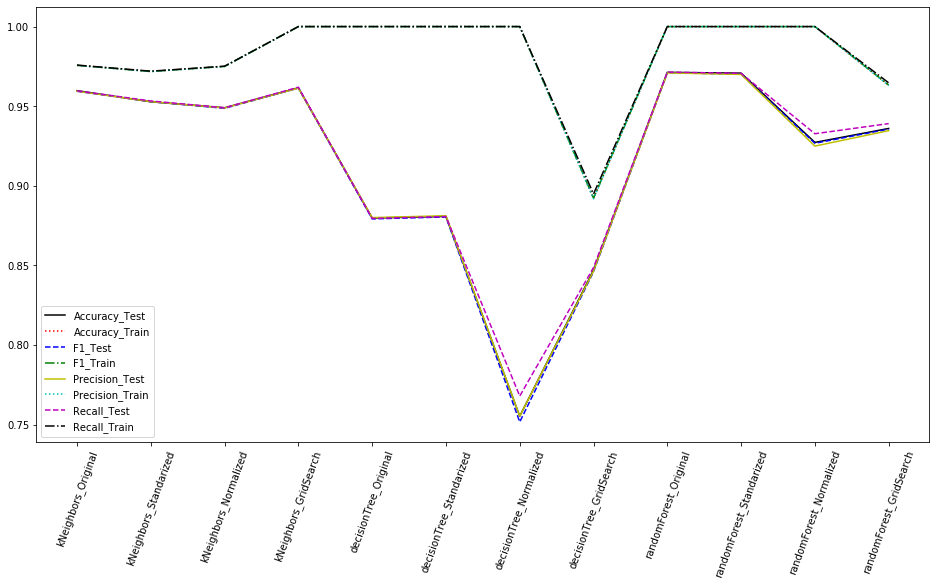

In [40]:
score.plot(style=["-", ":", "--", "-.", "-", ":", "--", "-."], color=["k", "r", "b", "g", "y", "c", "m", "k"], figsize=(16,8))
plt.xticks(np.arange(len(score.index.tolist())), score.index.tolist(), rotation=70)
plt.show()

In [41]:
forest = sklearn.ensemble.RandomForestClassifier()
forest.fit(xTrain, yTrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
yPredicted = forest.predict(xTest)

In [43]:
# Distribution of accuracy for each class of classifier
from sklearn.metrics import confusion_matrix

confusionMatrix = confusion_matrix(yTest, yPredicted)
confusionMatrix = confusionMatrix.astype('float') / confusionMatrix.sum(axis=1)[:, np.newaxis]
accuracyPerClass = pd.Series(confusionMatrix.diagonal(), dataSet.letter.sort_values(ascending=True).unique())
accuracyPerClass = accuracyPerClass.sort_values(ascending=False)
accuracyPerClass

Z    1.000000
A    1.000000
C    0.993590
Q    0.993103
Y    0.987013
W    0.985816
X    0.982659
U    0.981250
L    0.981132
O    0.978873
N    0.977612
D    0.976608
B    0.974684
S    0.974026
M    0.971098
V    0.967320
R    0.966443
T    0.966102
P    0.963636
J    0.962264
F    0.952096
G    0.950549
K    0.944056
E    0.937931
I    0.937008
H    0.926829
dtype: float64